# EP01 - Disciplina Programação Concorrente e Paralela
## (MAC0219 - 2021)

| Nomes - Grupo| Nº USP | 
|:---------- | ----------: |
| Ciro Batista Rosa | 2320769 |
| Diego Zurita | 10284222  |
| Francisco Edvar da Cunha Filho | 10656115 |
| Pedro Zamecki Andrade | 11207800 |

Este é o Notebook de apresentação dos resultados do EP01, o experimento proposto é comparar os resultados de tempo de execução de três algoritmos, sequencial e paralelizado por Pthreads e OpenMP. Para a realizar a comparação é utilizado um algoritmo para calcular regiões do Conjunto de Mandelbrot, são calculados 4 regiões diferentes: *Triple spiral, Elephant, Seahorse & Full*. Assim, para cada região de Mandelbrot é avaliado o tempo de 10 execuções para o conjunto de todas as combinações dos parâmetros: 

* I/O e Alocação Memória 
    * Com e Sem
* Nº de Threads 
    * 1, 2, 4, 8, 16 e 32
* Tamanho da Entrada (Imagem) 
    * 16, 32, 64, 128, 256, 512, 1024, 2048, 4096 e 8192

# Import

In [1]:
using CSV
using DataFrames
using DataFramesMeta
using Plots
using StatsPlots

# Funções

In [2]:
function plot_region(_df,region)
    p1 = plot(@df filter(row -> row.image_name ∈ region, _df) groupedboxplot(:image_size_log2, :time_sec_log2, group=:program_name, leg = :bottomright, 
        xlabel = "Tamanho de Entrada (log2)", ylabel = "Tempo de execução  (seg - log2)",
        title = "Tempo de execução pelo tamanho de entrada"))

    p2 = plot(@df filter(row -> row.image_name ∈ region, _df) groupedboxplot(:threads_log2, :time_sec_log2, group=:program_name, leg = :topright, 
            xlabel = "Número de Threads (log2)", ylabel = "Tempo de execução  (seg - log2)",
            title = "Tempo de execução - Número Threads"))

    display(plot(p1,p2, layout = (1,2), size = (1200,700)))
    
end


plot_region (generic function with 1 method)

# Data

In [3]:
#Leitura dos dados do experimento
df = DataFrame(CSV.File("experiment_results.csv"))

first(df,5)

,Column1,program,threads,image,image_size,time_sec,time_tolerance_sec
,Int64,String,Int64,String,Int64,Float64,Float64
1,0,mandelbrot_seq,1,elephant.log,16,0.001351,0.0004
2,1,mandelbrot_seq,1,elephant.log,32,0.001827,3.15e-5
3,2,mandelbrot_seq,1,elephant.log,64,0.0049725,4.43e-5
4,3,mandelbrot_seq,1,elephant.log,128,0.018374,0.000107
5,4,mandelbrot_seq,1,elephant.log,256,0.070903,0.000221


## Process Data

In [4]:
#Criar coluna com o nome do programa
df = @eachrow df begin
    @newcol program_name::Vector{String}
    if :program == "mandelbrot_seq"
        :program_name = "Sequencial"
    elseif :program == "mandelbrot_pth"
        :program_name = "Pthreads"
    elseif :program == "mandelbrot_omp"
        :program_name = "OpenMP"
    end  
end

first(df[!,"program_name"],5)

5-element Vector{String}:
 "Sequencial"
 "Sequencial"
 "Sequencial"
 "Sequencial"
 "Sequencial"

In [5]:
#Criar coluna com o nome do conjunto de Mandelbrot
df = @eachrow df begin
    @newcol image_name::Vector{String}
    if :image == "elephant.log"
        :image_name = "Elephant"
    elseif :image == "full.log"
        :image_name = "Full"
    elseif :image == "seahorse.log"
        :image_name = "Seahorse"
    elseif :image == "triple_spiral.log"
        :image_name = "Triple Spiral"
    end  
end

first(df[!,"image_name"],5)

5-element Vector{String}:
 "Elephant"
 "Elephant"
 "Elephant"
 "Elephant"
 "Elephant"

In [6]:
#Criar coluna com o nome do conjunto de Mandelbrot
df = @eachrow df begin
    @newcol io_cat::Vector{String}
    if :io == 1
        :io_cat = "Com I/O"
    elseif :io == 0
        :io_cat = "Sem I/O"
    end  
end

first(df[!,"io_cat"],5)

5-element Vector{String}:
 "Com I/O"
 "Com I/O"
 "Com I/O"
 "Com I/O"
 "Com I/O"

In [7]:
df = @eachrow df begin
    @newcol image_size_log2::Vector{Float64}
    @newcol threads_log2::Vector{Float64}
    @newcol time_sec_log2::Vector{Float64}

    :image_size_log2 = log2(:image_size) 
    :threads_log2 = log2(:threads) 
    :time_sec_log2 = log2(:time_sec) 
end

first(df[!,["image_size_log2","time_sec_log2","threads_log2"]],5)

,image_size_log2,time_sec_log2,threads_log2
,Float64,Float64,Float64
1,4.0,-9.53176,0.0
2,5.0,-9.09631,0.0
3,6.0,-7.65181,0.0
4,7.0,-5.76619,0.0
5,8.0,-3.81801,0.0


# 1.Tamanho de Entrada

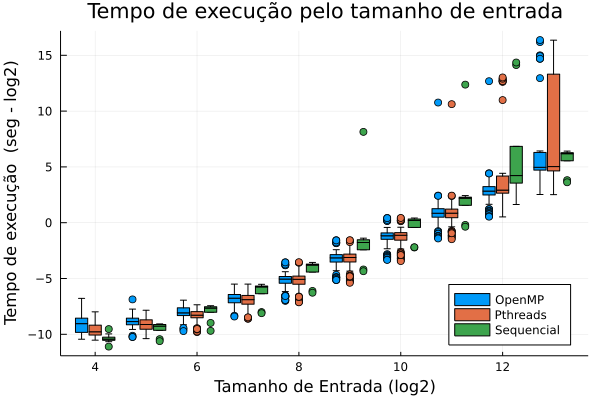

In [8]:
plot(@df df groupedboxplot(:image_size_log2, :time_sec_log2, group=:program_name, leg = :bottomright, 
        xlabel = "Tamanho de Entrada (log2)", ylabel = "Tempo de execução  (seg - log2)",
        title = "Tempo de execução pelo tamanho de entrada"))

# 2.Conjunto de Mandelbrot

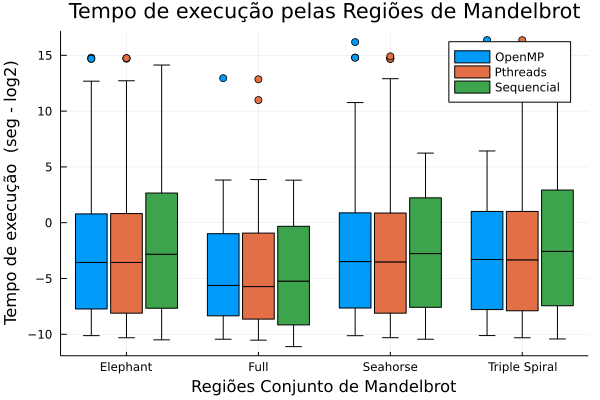

In [9]:
plot(@df df groupedboxplot(:image_name, :time_sec_log2, group=:program_name, leg = :topright, 
        xlabel = "Regiões Conjunto de Mandelbrot", ylabel = "Tempo de execução  (seg - log2)",
        title = "Tempo de execução pelas Regiões de Mandelbrot"))

# 3.Número de Threads

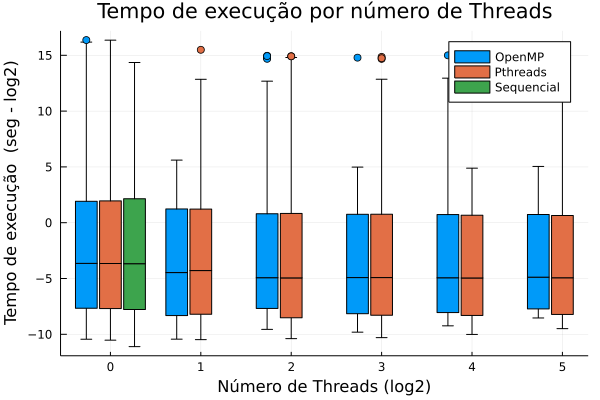

In [10]:
plot(@df df groupedboxplot(:threads_log2, :time_sec_log2, group=:program_name, leg = :topright, 
        xlabel = "Número de Threads (log2)", ylabel = "Tempo de execução  (seg - log2)",
        title = "Tempo de execução por número de Threads"))

# 4.I/O e Alocação de memória

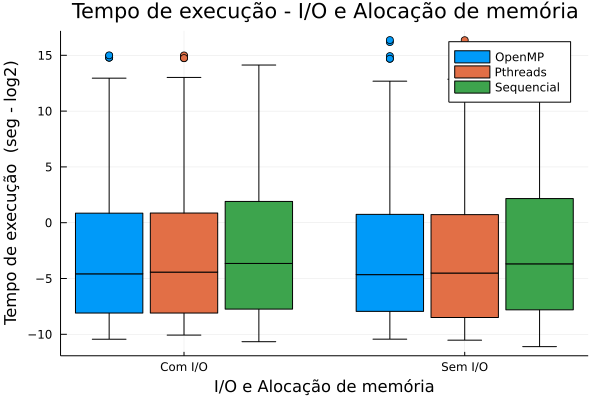

In [11]:
plot(@df df groupedboxplot(:io_cat, :time_sec_log2, group=:program_name, leg = :topright, 
        xlabel = "I/O e Alocação de memória", ylabel = "Tempo de execução  (seg - log2)",
        title = "Tempo de execução - I/O e Alocação de memória"))

## Apenas Sequencial

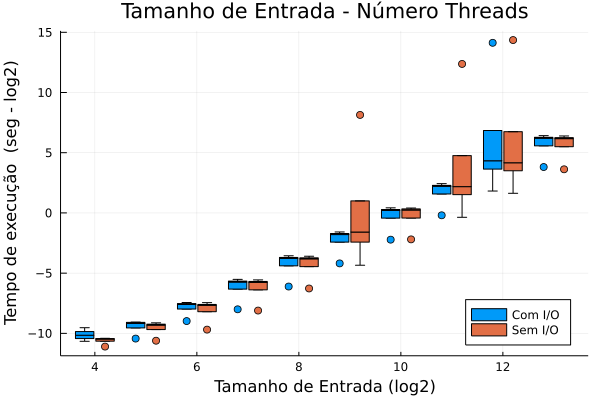

In [12]:
plot(@df filter(row -> row.program_name ∈ ["Sequencial"], df) groupedboxplot(:image_size_log2, :time_sec_log2, group=:io_cat, leg = :bottomright, 
            xlabel = "Tamanho de Entrada (log2)", ylabel = "Tempo de execução  (seg - log2)",
            title = "Tamanho de Entrada - Número Threads"))

# 5.Avaliação por Região de Mandelbrot

## 5.1.Elephant

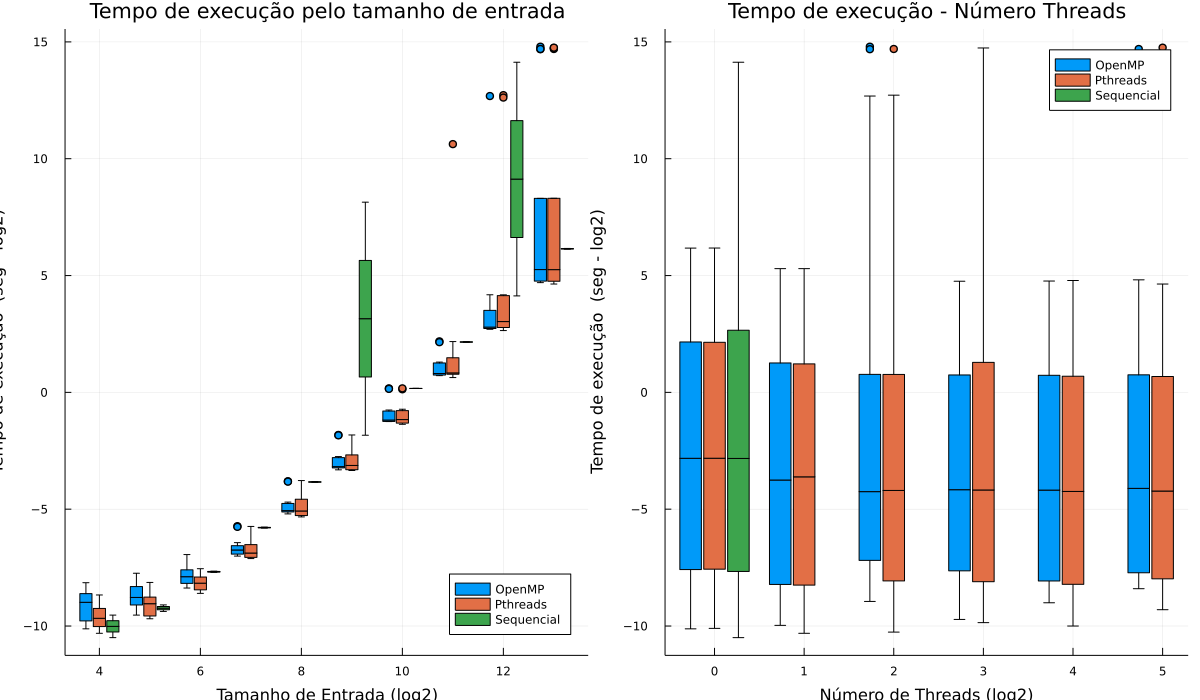

In [13]:
plot_region(df,["Elephant"])

## 5.2.Full

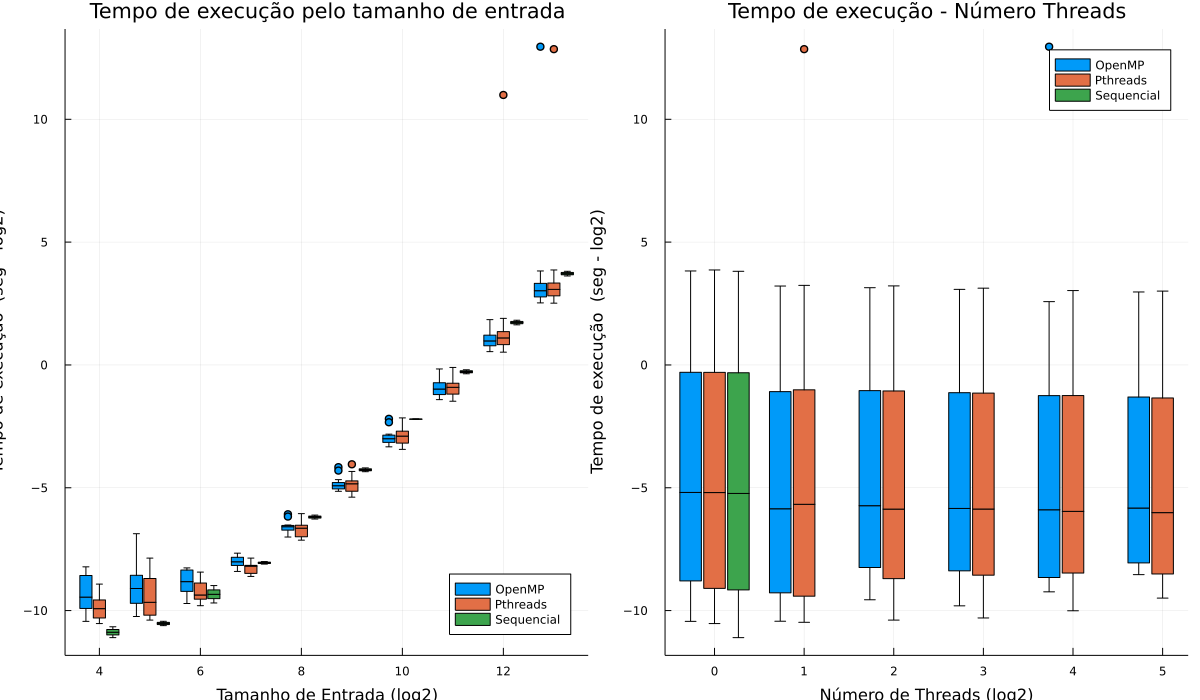

In [14]:
plot_region(df,["Full"])

## 5.3.Seahorse

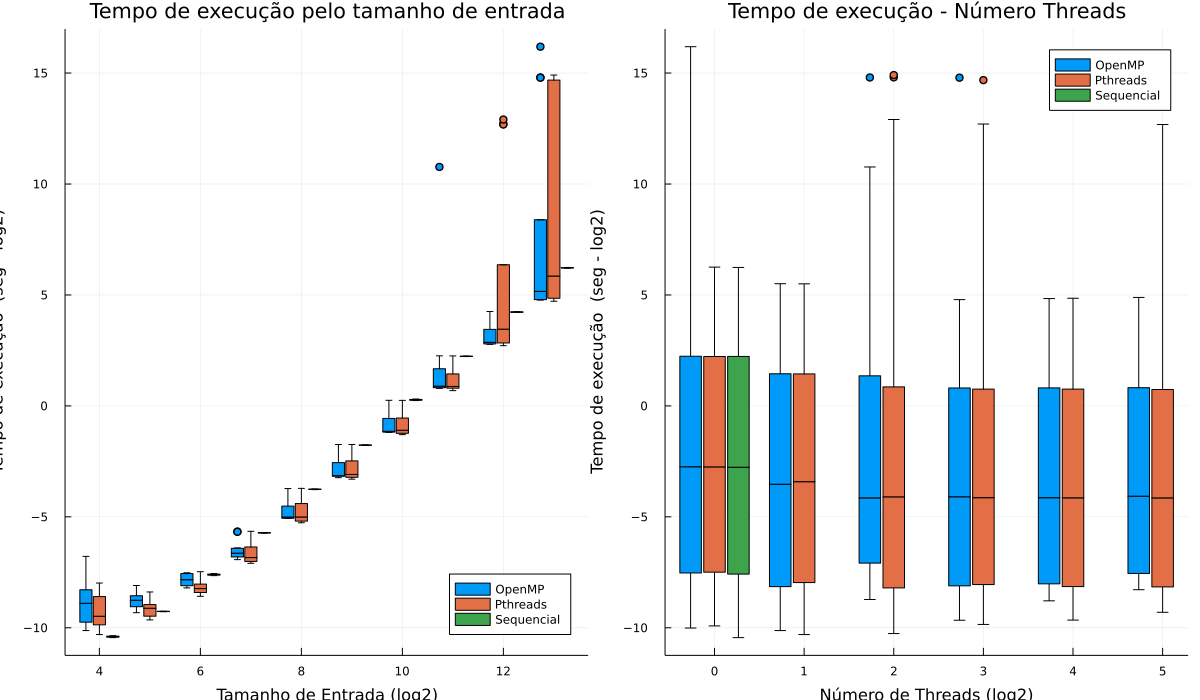

In [15]:
plot_region(df,["Seahorse"])

## 5.4.Triple Spiral

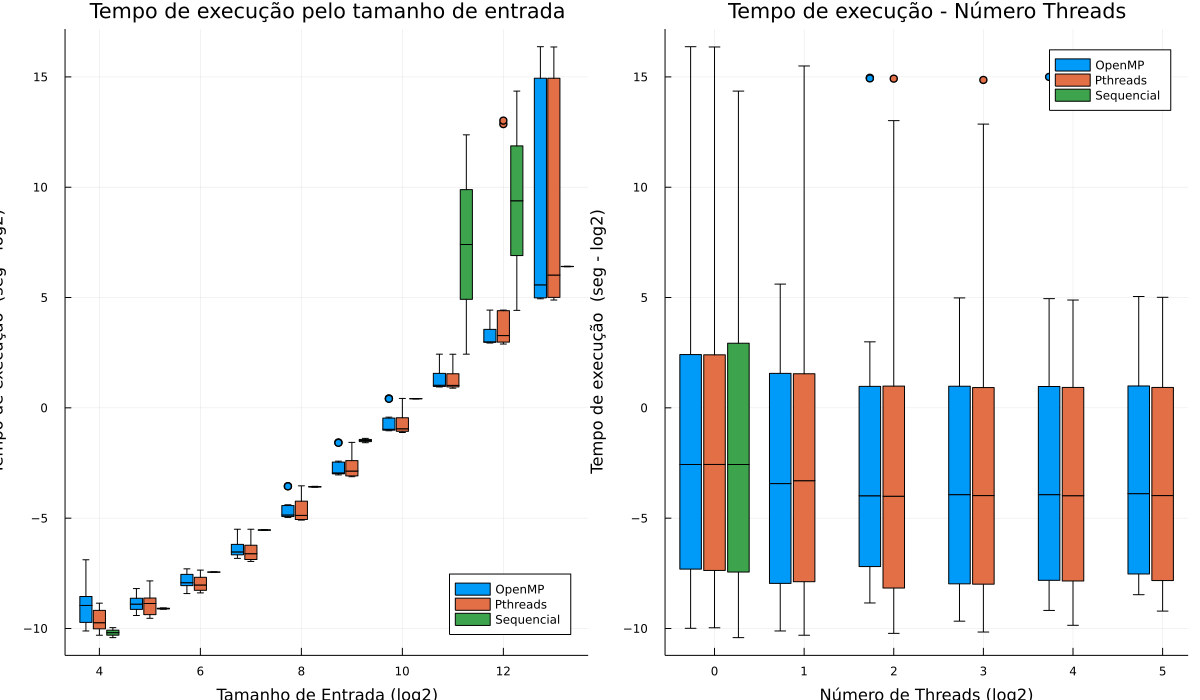

In [16]:
plot_region(df,["Triple Spiral"])

# Análise de Resultados

A partir dos resultados apresentados nas seções de 1 a 5, avaliamos o compartamento variando:

##### Tamanho de Entrada

* Os resultados obtidos mostram o crescimento exponencial do tempo pelo tamanho de entrada, contudo entre os algoritmos a cada tamanho de imagem é possível notar que em média para tamanhos muito baixos o método sequencial supera os paralelos, porém para tamanhos baixos/médios os métodos paralelos já superam o sequencial. Também é possível notar que os métodos paralelos, Pthreads e OpenMP, tem uma eficiência similar para as regiões Elephant e Full, mas para Seahorse e Triple Spiral o OpenMP possui uma média de tempo inferior para os maiores tamanhos avaliados.

##### Conjunto de Mandelbrot

* O tempo de execução para a região full é em média menor do que as outras regiões que possuem um tempo similar 

##### Número de Threads

* Para apenas 1 thread o tempo médio de todos o algoritmos é igual, ao aumentar a quantidade de threads o tempo de execução  reduz apenas até 4 threads ficando constante após. Este comportamento é encontrado em todas as regiões avaliadas, sugerindo um limite na paralelização para se obter um resultado ótimo de tempo a depender do problema.

##### I/O e Alocação de memória

* O tempo médio de execução não apresentou grande variação sem e com I/O para os algoritmos avaliando pelo número de threads e regiões de Mandelbrot